### Imports

In [1]:
import cartoframes
import pathways
from cartoframes.viz import Map, Layer, color_category_style
from pathways.auth import set_default_credentials
from pathways.catalog import search
import geopandas as gpd
import pandas as pd
import seaborn as sns
from pathways.display import display_info

In [2]:
cartoframes.utils.setup_metrics(False)

### Setting up Pathways client

In [3]:
#set_default_credentials('creds.json')

In [4]:
datasets = search('bike')
datasets

,Id,Name,DisplayName,GeometryType
0,a52b1a22-9d72-4572-ad5a-352c4893b18c,Bike Infrastructure,Bike Infrastructure,LRSLine
1,57f36d93-0a6d-4a49-ad9a-b24b5ce086d8,Bike & Pedestrian Safety,Bike & Pedestrian Safety,LrsPoint


In [5]:
bikes_df = pathways.read_dataset('57f36d93-0a6d-4a49-ad9a-b24b5ce086d8')

downloading from pathways:: 2.71MB [00:01, 1.37MB/s]                                                                   


In [6]:
infra_df = pathways.read_dataset('a52b1a22-9d72-4572-ad5a-352c4893b18c')

downloading from pathways:: 844kB [00:00, 1.02MB/s]                                                                    


In [7]:
Map(Layer(bikes_df))

In [8]:
from pathways.display import display_info
display_info(bikes_df)

In [9]:
bikes_df.dtypes

RTE_NM              object
MEASURE            float64
DOCUMENT_NBR         int64
CRASH_YEAR          object
CRASH_SEVERITY      object
                    ...   
NODE                object
OFFSET             float64
LAT                float64
LON                float64
geometry          geometry
Length: 152, dtype: object

In [10]:
# How does the presence of built infrastructure affect accidents?
# Calculate the number of bike and pedestrian accidents that occur in the absence of built infrastructure

bikes_df.groupby(['BIKE_NONBIKE']).size().reset_index(name='counts').sort_values(['counts'], ascending=False)

,BIKE_NONBIKE,counts
0,0,10971
1,1,4488


In [11]:
subset_bike_df = bikes_df[(bikes_df.BIKE_NONBIKE.str.fullmatch("1", na=False))]
subset_bike_df

,RTE_NM,MEASURE,DOCUMENT_NBR,CRASH_YEAR,CRASH_SEVERITY,DRIVER_VEHICLENUMBER,DRIVER_INJURYTYPE,DRIVER_AGE,DRIVER_GENDER,DRIVER_ACTION_TYPE_CD,...,INTERSECTION_ANALYSIS,PLAN_DISTRICT,MPO_NAME,ROUTE_OR_STREET_NM,RNS_MP,NODE,OFFSET,LAT,LON,geometry
3,R-VA SR00165NB,24.406809,142205048,2014,C,1;2,C;PDO,19;34,Male;Female,10. Wrong Side Of Road - Not Overtaking;1. No ...,...,2,23,HAMP,4100 BLOCK PRINCESS ANNE ROAD,24.47,541154,48.0,36.793202,-76.118776,POINT (-8473487.099 4410307.857)
4,R-VA SR00170EB,0.838844,141190244,2014,C,1;2,C;PDO,25;57,Male;Male,37. Other;1. No Improper Action,...,0,23,HAMP,1800 BLK E LITTLE CREEK RD,0.88,483459,1056.0,36.915672,-76.224159,POINT (-8485234.271 4427359.014)
7,R-VA099SC00641WB,1.171858,143305301,2014,A,1;2;3,A;PDO;PDO,61;46;40,Male;Female;Female,10. Wrong Side Of Road - Not Overtaking;11. Di...,...,1,23,HAMP,PENNIMAN ROAD,1.19,671200,32.0,37.264092,-76.665853,POINT (-8534409.737 4475989.346)
8,R-VA US00001PA003,0.705294,150235118,2014,B,1;2,B;PDO,30;64,Male;Male,37. Other;1. No Improper Action,...,2,19,TCAT,SOUTH ST,0.71,248694,5.0,37.225275,-77.415665,POINT (-8617875.028 4470552.944)
10,R-VA US00001SB,91.747502,141435189,2014,B,1;2,B;NA,44,Male; n/a,31. Avoiding Other Vehicle; n/a,...,0,15,RICH,LEE BRIDGE,92.42,209579,2365.0,37.532267,-77.449873,POINT (-8621679.454 4513563.405)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15448,R-VA SR00143SB,16.579828,211035368,2021,B,1;2;3,NA;PDO;B,54;56,n/a;Male;Male,34. Hit and Run;1. No Improper Action;1. No Im...,...,0,23,HAMP,JEFFERSON AVE,17.54,646114,1193.0,37.101118,-76.491669,POINT (-8515008.408 4453200.317)
15449,None,NaN,210785130,2021,A,1;2,PDO;A,23;16,Male;Male,2. Exceeded Speed Limit;22. Disregarded Stop o...,...,0,16,FRED,COASTAL AVE,0.86,None,NaN,38.445545,-77.438195,None
15451,R-VA SR00351EB,3.281126,210765093,2021,C,1;2,C;NA,35,Male; n/a,1. No Improper Action;34. Hit and Run,...,0,23,HAMP,1700 W PEMBROKE AVE,3.20,253177,861.0,37.014353,-76.382943,POINT (-8502914.899 4441103.796)
15457,R-VA000SC00004EB,0.314617,210115021,2021,B,1;2,PDO;B,37;27,Female;Male,17. Other Improper Turn;1. No Improper Action,...,2,8,NOVA,CLARENDON BLVD,0.31,101373,1098.0,38.888357,-77.091783,POINT (-8581814.191 4705693.719)


In [12]:
# get the values of bike_ped dataset where pedestrians are involved in a accident in table form (total displayed below)
subset_ped_df = bikes_df[(bikes_df.PED_NONPED.str.fullmatch("1", na=False))]
subset_ped_df

,RTE_NM,MEASURE,DOCUMENT_NBR,CRASH_YEAR,CRASH_SEVERITY,DRIVER_VEHICLENUMBER,DRIVER_INJURYTYPE,DRIVER_AGE,DRIVER_GENDER,DRIVER_ACTION_TYPE_CD,...,INTERSECTION_ANALYSIS,PLAN_DISTRICT,MPO_NAME,ROUTE_OR_STREET_NM,RNS_MP,NODE,OFFSET,LAT,LON,geometry
0,R-VA029SC06603WB,0.031148,142880057,2014,A,1,PDO,64,Male,1. No Improper Action,...,0,8,NOVA,RT 6603 / MT VERNON CIRCLE,0.03,274546,1183.0,38.705908,-77.117434,POINT (-8584670.082 4679625.503)
1,R-VA000SC00015SB,0.000000,142775180,2014,C,1,PDO,24,Female,17. Other Improper Turn,...,2,8,NOVA,N. QUINN ST,0.00,100881,26.0,38.894163,-77.078193,POINT (-8580302.159 4706512.171)
2,S-VA000PR S JUNE ST,0.125716,140955153,2014,B,1,PDO,76,Male,1. No Improper Action,...,2,8,NOVA,26TH ST. S.,0.13,None,NaN,38.851974,-77.064044,POINT (-8578730.237 4700494.366)
5,R-VA000SC06591NB,0.060683,141715310,2014,B,1,PDO,59,Male,11. Did Not Have Right-of-Way,...,2,8,NOVA,ARLINGTON RIDGE ROAD,0.03,100307,26.0,38.845377,-77.064998,POINT (-8578832.702 4699535.288)
6,R-VA076SC03634SB,0.149493,140525219,2014,A,1,PDO,66,Female,1. No Improper Action,...,1,8,NOVA,ROUTE 3634 / GLADE BANK DRIVE,0.15,750483,132.0,38.773064,-77.444390,POINT (-8621073.068 4689205.911)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15452,R-VA IS00095SB,12.792476,210285263,2021,K,1,PDO,24,Male,1. No Improper Action,...,0,19,None,INTERSTATE 95,13.01,None,NaN,36.723622,-77.529953,POINT (-8630589.799 4400658.735)
15453,R-VA SR00294EB,13.377945,210895037,2021,B,1,None,None,n/a,34. Hit and Run,...,0,8,NOVA,0294 / PRINCE WILLIAM PARKWAY,13.38,None,NaN,38.651050,-77.301959,POINT (-8605196.847 4671816.595)
15454,R-VA099SC00621EB,0.306305,210125201,2021,B,1,C,87,Female,1. No Improper Action,...,0,23,HAMP,ROUTE 621 (GRAFTON DRIVE),0.31,671097,348.0,37.164219,-76.467250,POINT (-8512290.700 4462017.029)
15455,R-VA121UR07034EB,1.925092,210145256,2021,A,1,PDO,None,n/a,9. Other Improper Passing,...,0,23,HAMP,HARPERSVILLE RD,1.96,646380,290.0,37.095633,-76.450953,POINT (-8510491.619 4452452.109)


<AxesSubplot:xlabel='CRASH_SEVERITY', ylabel='Count'>

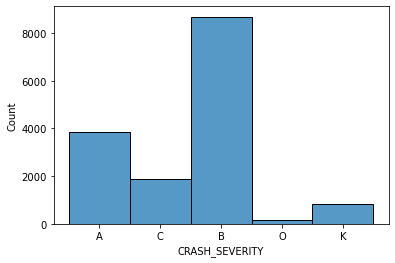

In [13]:
# Breakdown Accidents by Severity and Year
sns.histplot(data=bikes_df, x="CRASH_SEVERITY")

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<AxesSubplot:xlabel='CRASH_YEAR', ylabel='Count'>

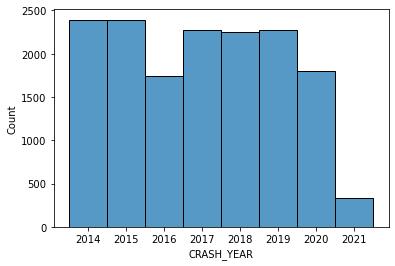

In [14]:
sns.histplot(data=bikes_df, x="CRASH_YEAR")

In [15]:
#Display pedestrian accidents subset by severity
Map(Layer(subset_ped_df, color_category_style('CRASH_SEVERITY')))

In [16]:
#Display Bike accidents by Severity
Map(Layer(subset_bike_df, color_category_style('CRASH_SEVERITY')))

[Text(0, 0, '6-Natural Surface Trail'),
 Text(1, 0, '2-Shared Use Path'),
 Text(2, 0, '1-Designated bike lane'),
 Text(3, 0, '3-Shared Lane'),
 Text(4, 0, '4-Paved Shoulder'),
 Text(5, 0, '5-Sidewalk'),
 Text(6, 0, '1-Designated bike Lane '),
 Text(7, 0, '1-Designated bike lane '),
 Text(8, 0, '2-Shared use path')]

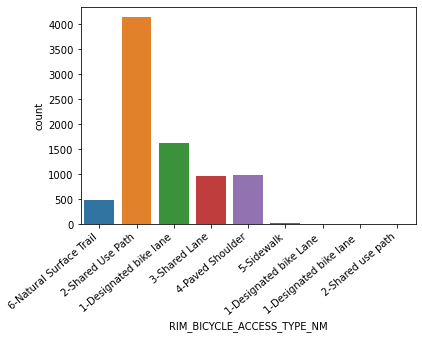

In [17]:
#Infrastructure Implemented By Type
infra =sns.countplot(data=infra_df, x="RIM_BICYCLE_ACCESS_TYPE_NM")
infra.set_xticklabels(infra.get_xticklabels(), rotation=40, ha="right")

[Text(0, 0, '2017'),
 Text(1, 0, '2018'),
 Text(2, 0, 'FY17'),
 Text(3, 0, '2016'),
 Text(4, 0, '2008'),
 Text(5, 0, '2015'),
 Text(6, 0, '2012'),
 Text(7, 0, '2002'),
 Text(8, 0, '2014'),
 Text(9, 0, '2010'),
 Text(10, 0, '2013'),
 Text(11, 0, '2019'),
 Text(12, 0, '2011')]

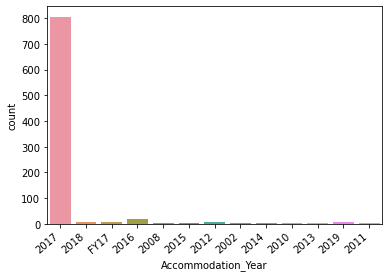

In [18]:
#Infrastructure Implemented By Year
infrabyyear = sns.countplot(data=infra_df, x="Accommodation_Year")
infrabyyear.set_xticklabels(infrabyyear.get_xticklabels(), rotation=40, ha="right")

In [19]:
#calculate total # of infrastructure projects in 2017
subset_infra2017_df = infra_df[(infra_df.Accommodation_Year.str.fullmatch("2017", na=False))]
subset_infra2017_df

,Shape_Length,RTE_NM,FROM_MEASURE,TO_MEASURE,FID_Bicycle_,RTE_COMMON_NM,RIM_SIDE_OF_ROAD_NM,RIM_BICYCLE_RTE_TYPE_NM,RIM_BICYCLE_ACCESS_TYPE_NM,RIM_BICYCLE_PEDESTRIAN_OWNR_NM,...,x_to,y_to,Ln_Mi_Factor,Accom_Type,Comments,GOVERNMENT_CONTROL_ID,Planning_Status,NEAR_FID,NEAR_DIST,geometry
25,264.314812,R-VA US00029NBBUS001,3.595776,3.727314,4505,BUS US-29N (1 City of Danville),5-Left and Right sides,None,2-Shared Use Path,LOCAL,...,-79.431089,36.577048,2.0,Facility,None,4,None,-1,-1.000000,None
26,0.313613,R-VA SR00293NB,2.114669,2.114825,1370,VA-293N,5-Left and Right sides,None,1-Designated bike lane,LOCAL,...,-79.407532,36.578879,2.0,Facility,None,4,None,8961,0.720918,None
29,110.168396,R-VA SR00293NB,2.114825,2.169486,5380,VA-293N,3-Left side,None,1-Designated bike lane,LOCAL,...,-79.405698,36.578895,1.0,Facility,None,4,None,8961,0.000085,None
30,94.440196,R-VA SR00293NB,2.169486,2.216344,5380,VA-293N,3-Left side,None,1-Designated bike lane,LOCAL,...,-79.405698,36.578895,1.0,Facility,None,4,None,-1,-1.000000,None
31,1283.537819,R-VA SR00293NB,1.477828,2.114669,1370,VA-293N,5-Left and Right sides,None,1-Designated bike lane,LOCAL,...,-79.407532,36.578879,2.0,Facility,None,4,None,199,0.000030,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7972,610.267220,R-VA053SC02150EB,1.994626,2.281313,3245,None,5-Left and Right sides,None,4-Paved Shoulder,VDOT,...,-77.464261,39.034446,2.0,None,None,2,None,-1,-1.000000,None
7974,609.414535,R-VA053SC02150WB,2.001385,2.287978,4484,None,5-Left and Right sides,None,4-Paved Shoulder,VDOT,...,-77.464311,39.034604,2.0,None,None,None,None,-1,-1.000000,None
8011,1849.612424,R-VA US00011NB,319.105102,320.015231,1367,None,5-Left and Right sides,None,4-Paved Shoulder,VDOT,...,-78.239792,39.063558,2.0,None,None,1,None,-1,-1.000000,None
8032,849.246499,R-VA US00011NB,320.916632,321.334517,5280,None,5-Left and Right sides,None,4-Paved Shoulder,VDOT,...,-78.223568,39.077363,2.0,None,None,1,None,-1,-1.000000,None


[Text(0, 0, '2-Shared Use Path'),
 Text(1, 0, '1-Designated bike lane'),
 Text(2, 0, '4-Paved Shoulder'),
 Text(3, 0, '3-Shared Lane')]

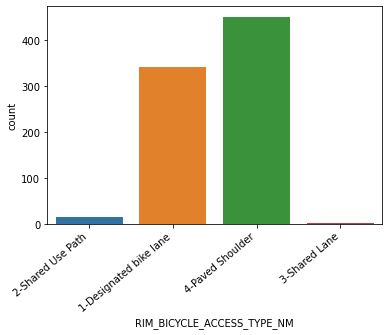

In [20]:
# Chart Infrastructure implemented by type in 2017
infrasev = sns.countplot(data=subset_infra2017_df, x="RIM_BICYCLE_ACCESS_TYPE_NM")
infrasev.set_xticklabels(infrasev.get_xticklabels(), rotation=40, ha="right")


In [21]:
infra_df.set_crs("EPSG:3857")

,Shape_Length,RTE_NM,FROM_MEASURE,TO_MEASURE,FID_Bicycle_,RTE_COMMON_NM,RIM_SIDE_OF_ROAD_NM,RIM_BICYCLE_RTE_TYPE_NM,RIM_BICYCLE_ACCESS_TYPE_NM,RIM_BICYCLE_PEDESTRIAN_OWNR_NM,...,x_to,y_to,Ln_Mi_Factor,Accom_Type,Comments,GOVERNMENT_CONTROL_ID,Planning_Status,NEAR_FID,NEAR_DIST,geometry
0,556.731655,None,NaN,NaN,507,None,None,None,6-Natural Surface Trail,LOCAL,...,-75.878416,36.553657,1.0,Trail,None,None,None,-1,-1.000000,None
1,1729.585475,None,NaN,NaN,507,None,None,None,6-Natural Surface Trail,LOCAL,...,-75.878416,36.553657,1.0,Trail,None,None,None,-1,-1.000000,None
2,443.054710,None,NaN,NaN,1109,None,None,None,2-Shared Use Path,LOCAL,...,-79.357163,36.559067,1.0,Facility,None,None,None,-1,-1.000000,None
3,612.302700,None,NaN,NaN,1941,None,None,None,2-Shared Use Path,LOCAL,...,-79.370441,36.570259,1.0,Facility,None,None,None,-1,-1.000000,None
4,307.363207,None,NaN,NaN,1109,None,None,None,2-Shared Use Path,LOCAL,...,-79.357163,36.559067,1.0,Facility,None,None,None,-1,-1.000000,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8269,1.715664,S-VA138NP MEADOW BRANCH AVE,0.537864,0.538682,423,Meadow Branch AVE (NP - City of Winchester),3-Left side,None,2-Shared Use Path,LOCAL,...,-78.191810,39.184462,1.0,Facility,None,None,None,-1,-1.000000,None
8270,1102.048017,S-VA138NP MEADOW BRANCH AVE,0.012301,0.537864,423,Meadow Branch AVE (NP - City of Winchester),3-Left side,None,2-Shared Use Path,LOCAL,...,-78.191810,39.184462,1.0,Facility,None,None,None,12275,29.636627,None
8271,1451.177548,R-VA US00050EB,14.663564,15.364705,3205,US-50E,None,None,2-Shared Use Path,VDOT,...,-78.179684,39.188685,1.0,Facility,None,1,None,10284,0.000022,None
8272,9370.758028,R-VA SR00287NB,5.592363,10.077319,3951,None,5-Left and Right sides,None,4-Paved Shoulder,VDOT,...,-77.640913,39.272711,2.0,None,None,1,None,-1,-1.000000,None


In [22]:
from geopandas.tools import sjoin
join_left_bike = sjoin(bikes_df, infra_df, how ='left')
join_left_bike

C:\ProgramData\Anaconda3\envs\pathways-ds\lib\site-packages\ipykernel_launcher.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:3857
Right CRS: None

  


,RTE_NM_left,MEASURE,DOCUMENT_NBR,CRASH_YEAR,CRASH_SEVERITY,DRIVER_VEHICLENUMBER,DRIVER_INJURYTYPE,DRIVER_AGE,DRIVER_GENDER,DRIVER_ACTION_TYPE_CD,...,y_from,x_to,y_to,Ln_Mi_Factor,Accom_Type,Comments,GOVERNMENT_CONTROL_ID,Planning_Status,NEAR_FID,NEAR_DIST
0,R-VA029SC06603WB,0.031148,142880057,2014,A,1,PDO,64,Male,1. No Improper Action,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,R-VA000SC00015SB,0.000000,142775180,2014,C,1,PDO,24,Female,17. Other Improper Turn,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,S-VA000PR S JUNE ST,0.125716,140955153,2014,B,1,PDO,76,Male,1. No Improper Action,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R-VA SR00165NB,24.406809,142205048,2014,C,1;2,C;PDO,19;34,Male;Female,10. Wrong Side Of Road - Not Overtaking;1. No ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,R-VA SR00170EB,0.838844,141190244,2014,C,1;2,C;PDO,25;57,Male;Male,37. Other;1. No Improper Action,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15454,R-VA099SC00621EB,0.306305,210125201,2021,B,1,C,87,Female,1. No Improper Action,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15455,R-VA121UR07034EB,1.925092,210145256,2021,A,1,PDO,None,n/a,9. Other Improper Passing,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15456,R-VA SR00149WB,1.185413,210805164,2021,B,1,PDO,46,Male,1. No Improper Action,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15457,R-VA000SC00004EB,0.314617,210115021,2021,B,1;2,PDO;B,37;27,Female;Male,17. Other Improper Turn;1. No Improper Action,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
infra_df.to_crs("EPSG:3857")

ValueError: Cannot transform naive geometries.  Please set a crs on the object first.

In [ ]:
Map(Layer(join_left_bike))